In [1]:
import pandas as pd 
import numpy as np

data = pd.read_csv('./energy_grouped_with_Ca.csv',  index_col=None)
# data = pd.read_csv('./IntE_terms_for_Reweighting.csv',  index_col=None)



def indexify(x):

    seq = sorted(x, reverse = True)
    index = [seq.index(v)+1 for v in x]
    return index


In [2]:
data

,System,Elec-SR,VdW-SR,Elec-LR,VdW-LR,sum_E,Expt_Kd
0,WT-Ca,-1920.9,-25.90,734.3,15.6,-1196.90,71000000.0
1,D9M-Nd,-4270.5,-69.83,1928.4,117.2,-2294.73,1460.0
2,D9H-Nd,-4335.7,-70.83,2188.9,116.6,-2101.03,2150.0
3,D9A-Nd,-4249.9,-67.35,2023.2,116.7,-2177.35,397.0
4,D9N-Nd,-4127.0,-59.26,1991.5,117.6,-2077.16,53.1
5,WT-Nd,-4380.7,-70.41,2044.6,118.5,-2288.01,5.3


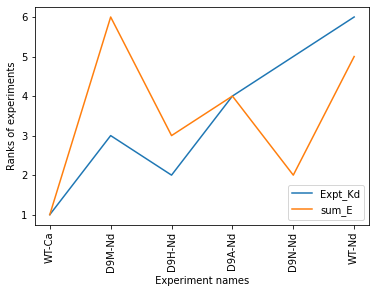

In [3]:
import matplotlib.pyplot as plt 

y1 = indexify(data['Expt_Kd'])
y2 = indexify(data['sum_E'])

x = [i+1 for i in range(len(y1))]


plt.plot(x,y1)
plt.plot(x,y2)
plt.ylabel('Ranks of experiments')
plt.xlabel(' Experiment names ')
plt.xticks(x,list(data['System']),rotation = 90)
plt.legend(['Expt_Kd','sum_E'])

In [4]:
kd_rank = indexify(list(data['Expt_Kd']))
print(kd_rank)

[1, 3, 2, 4, 5, 6]


In [5]:
weights = np.array([1,1,1,1])
data_4 = np.array(data[["Elec-SR","VdW-SR","Elec-LR","VdW-LR"]])
data_4

array([[-1920.9 ,   -25.9 ,   734.3 ,    15.6 ],
       [-4270.5 ,   -69.83,  1928.4 ,   117.2 ],
       [-4335.7 ,   -70.83,  2188.9 ,   116.6 ],
       [-4249.9 ,   -67.35,  2023.2 ,   116.7 ],
       [-4127.  ,   -59.26,  1991.5 ,   117.6 ],
       [-4380.7 ,   -70.41,  2044.6 ,   118.5 ]])

In [6]:
list_ = indexify(data['sum_E'])

print(list_)

[1, 6, 3, 4, 2, 5]


In [7]:
def sum_calc_easy(weights, kd_rank, data_4):
    list_ = []
    for i in range(data_4.shape[0]):
        list_.append(np.sum(data_4[i]*weights))

    list_ = indexify(np.array(list_))



    return np.corrcoef(np.array(list_),np.array(kd_rank))[1][0]

In [8]:
frac = np.linspace(0,1,11)
mult = np.linspace(2,10,9)
frac_mult = np.concatenate((frac,mult), axis = 0)
frac_mult

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        2. ,  3. ,  4. ,  5. ,  6. ,  7. ,  8. ,  9. , 10. ])

In [9]:
dict_ = {}
counter = 0
for i in frac_mult:
    for j in frac_mult:
        for k in frac_mult:
            for l in frac_mult:
                inside_dict = {}
                inside_dict['w1'] = i
                inside_dict['w2'] = j
                inside_dict['w3'] = k
                inside_dict['w4'] = l 
                
                sum_ = sum_calc_easy(np.array([i,j,k,l]), kd_rank, data_4)
                inside_dict['sum'] = sum_
                dict_[counter] = inside_dict
                counter+=1
                if counter % 100000 == 0:
                    print('done: ', counter)


c:\Users\15156\anaconda3\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\Users\15156\anaconda3\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


done:  100000


In [10]:
# import pickle

# with open('weights_n_pearson.pkl', 'wb') as fp:
#     pickle.dump(dict_, fp)
#     print('dictionary saved successfully to file')

In [11]:
main_data = pd.DataFrame(dict_).transpose().sort_values(by = 'sum')#[main_data['sum'] >= sum_calc_easy([1,1,1,1], kd_rank, data_4)]


In [12]:
main_data

,w1,w2,w3,w4,sum
1,0.0,0.0,0.0,0.1,-0.942857
4012,0.0,1.0,0.0,3.0,-0.942857
4013,0.0,1.0,0.0,4.0,-0.942857
3613,0.0,0.9,0.0,4.0,-0.942857
3612,0.0,0.9,0.0,3.0,-0.942857
...,...,...,...,...,...
52089,0.6,1.0,0.4,0.9,0.600000
52090,0.6,1.0,0.4,1.0,0.600000
52081,0.6,1.0,0.4,0.1,0.600000
74113,0.9,0.5,0.5,4.0,0.600000


In [13]:
main_data = main_data[main_data['sum'] >= sum_calc_easy([1,1,1,1], kd_rank, data_4)]

In [14]:
main_data

,w1,w2,w3,w4,sum
113703,5.0,0.4,0.5,0.3,0.428571
113707,5.0,0.4,0.5,0.7,0.428571
113708,5.0,0.4,0.5,0.8,0.428571
113685,5.0,0.4,0.4,0.5,0.428571
113700,5.0,0.4,0.5,0.0,0.428571
...,...,...,...,...,...
52088,0.6,1.0,0.4,0.8,0.600000
52089,0.6,1.0,0.4,0.9,0.600000
52090,0.6,1.0,0.4,1.0,0.600000
52081,0.6,1.0,0.4,0.1,0.600000


In [15]:
# import matplotlib.pyplot as plt
# plt.plot([x+1 for x in range(len(sorted_dataframe['sum']))], sorted_dataframe['sum'])

In [16]:
weights = main_data[main_data['sum']==max(list(main_data['sum']))]
weights = np.array(weights)[-1][:-1]
weights

array([0.9, 0.5, 0.5, 4. ])

In [17]:
max(list(main_data['sum']))

0.6

In [18]:
system = {}
energies = {}
kd = {}



for i in np.array(data):

    a = {}
    energies = i[1:-2]
    a['energy'] = energies
    a['kd'] = i[-1]
    a['sum'] = sum(energies)
    weighted_energy = np.multiply(np.array(energies),np.array(weights))
    a['weighted_energy'] = weighted_energy
    sum_weighted_energy = np.sum(np.multiply(np.array(energies),np.array(weights)))
    a['weighted_sum'] = sum_weighted_energy
    a['frac_contribution'] = weighted_energy/sum_weighted_energy

    system[i[0]] = a


In [19]:
system

{'WT-Ca': {'energy': array([-1920.9, -25.9, 734.3, 15.6], dtype=object),
  'kd': 71000000.0,
  'sum': -1196.9000000000003,
  'weighted_energy': array([-1728.8100000000002, -12.95, 367.15, 62.4], dtype=object),
  'weighted_sum': -1312.21,
  'frac_contribution': array([1.3174796716988897, 0.009868847211955403, -0.27979515473895183,
         -0.047553364171893216], dtype=object)},
 'D9M-Nd': {'energy': array([-4270.5, -69.83, 1928.4, 117.2], dtype=object),
  'kd': 1460.0,
  'sum': -2294.73,
  'weighted_energy': array([-3843.4500000000003, -34.915, 964.2, 468.8], dtype=object),
  'weighted_sum': -2445.365,
  'frac_contribution': array([1.5717285558597593, 0.014278032113815321, -0.3942969658926173,
         -0.19170962208095726], dtype=object)},
 'D9H-Nd': {'energy': array([-4335.7, -70.83, 2188.9, 116.6], dtype=object),
  'kd': 2150.0,
  'sum': -2101.0299999999997,
  'weighted_energy': array([-3902.13, -35.415, 1094.45, 466.4], dtype=object),
  'weighted_sum': -2376.695,
  'frac_contributi

In [20]:
kd_list = indexify(data['Expt_Kd'])
sum_E = indexify([system[i]['sum'] for i in system.keys()])
sum_wE = indexify([system[i]['weighted_sum'] for i in system.keys()])
indx = list(system.keys())

rank_weighted = {}
rank_weighted['index'] = indx
rank_weighted['kd_list'] = kd_list 
rank_weighted['sum_E'] = sum_E
rank_weighted['sum_wE'] = sum_wE



rank_weighted = pd.DataFrame(rank_weighted).sort_values(by = 'kd_list')

In [21]:
rank_weighted

,index,kd_list,sum_E,sum_wE
0,WT-Ca,1,1,1
2,D9H-Nd,2,3,3
1,D9M-Nd,3,6,5
3,D9A-Nd,4,4,4
4,D9N-Nd,5,2,2
5,WT-Nd,6,5,6


Text(0.5, 0, '\nexperiments\n')

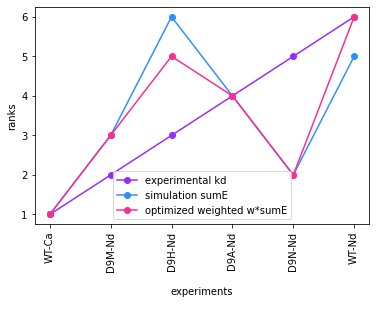

In [23]:
import matplotlib.pyplot as plt

x = [i+1 for i in range(len(rank_weighted['kd_list']))]

plt.plot(x,rank_weighted['kd_list'], color = '#962ef9', marker = 'o')
plt.plot(x,rank_weighted['sum_E'],color = '#2e91f9', marker = 'o')
plt.plot(x,rank_weighted['sum_wE'],color = '#f92e91', marker = 'o')
plt.xticks(x,list(system.keys()),rotation = 90)
# plt.plot(x1,y1,color = '#91f92e', marker = 'o')
# plt.plot(x2,y2,color='#962ef9', marker = 's')
# plt.plot(x3,y3,color ='#2e91f9', marker = '>')
# plt.plot(x4,y4, color = '#f92e91',marker = '*')
plt.ylabel('ranks')
plt.legend(['experimental kd','simulation sumE', 'optimized weighted w*sumE'])
plt.xlabel('\nexperiments\n')


In [32]:

print('kd rank: ',kd_list)
print('sum E: ',sum_E)
print('without weighted correlation')
print(np.corrcoef(kd_list,sum_E)[1][0])

print('\n'+'----------------------'+'\n')
print('kd rank: ',kd_rank)

print('sum wE: ',sum_wE)
print('correlation with weighted')
print(np.corrcoef(kd_list,sum_wE)[1][0])





kd rank:  [1, 3, 2, 4, 5, 6]
sum E:  [1, 6, 3, 4, 2, 5]
without weighted correlation
0.4285714285714286

----------------------

kd rank:  [1, 3, 2, 4, 5, 6]
sum wE:  [1, 5, 3, 4, 2, 6]
correlation with weighted
0.6


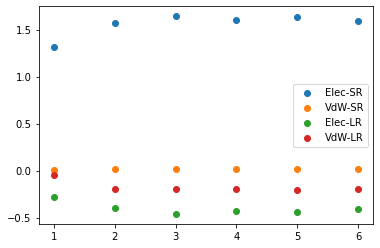

In [24]:
data_4 = np.array(data[["Elec-SR","VdW-SR","Elec-LR","VdW-LR"]])

frac_es = [system[i]['frac_contribution'][0] for i in system.keys()]
frac_vs = [system[i]['frac_contribution'][1] for i in system.keys()]
frac_el = [system[i]['frac_contribution'][2] for i in system.keys()]
frac_vl = [system[i]['frac_contribution'][3] for i in system.keys()]
x_frac = [i+1 for i in range(len(frac_es))]


plt.scatter(x_frac,frac_es)
plt.scatter(x_frac,frac_vs)
plt.scatter(x_frac,frac_el)
plt.scatter(x_frac,frac_vl)
# plt.xticks(x,list(data['System']),rotation = 90)
plt.legend(["Elec-SR","VdW-SR","Elec-LR","VdW-LR"])

In [25]:
def log_finder(array):
    import math
    out = []
    for i in array:
        if i == 0:
            out.append(0)
        else:
            out.append(math.log10(i))

    out[0] = 0

    return out

In [26]:
main_data

,w1,w2,w3,w4,sum
113703,5.0,0.4,0.5,0.3,0.428571
113707,5.0,0.4,0.5,0.7,0.428571
113708,5.0,0.4,0.5,0.8,0.428571
113685,5.0,0.4,0.4,0.5,0.428571
113700,5.0,0.4,0.5,0.0,0.428571
...,...,...,...,...,...
52088,0.6,1.0,0.4,0.8,0.600000
52089,0.6,1.0,0.4,0.9,0.600000
52090,0.6,1.0,0.4,1.0,0.600000
52081,0.6,1.0,0.4,0.1,0.600000


Text(0, 0.5, 'log (10 base) weights (w)')

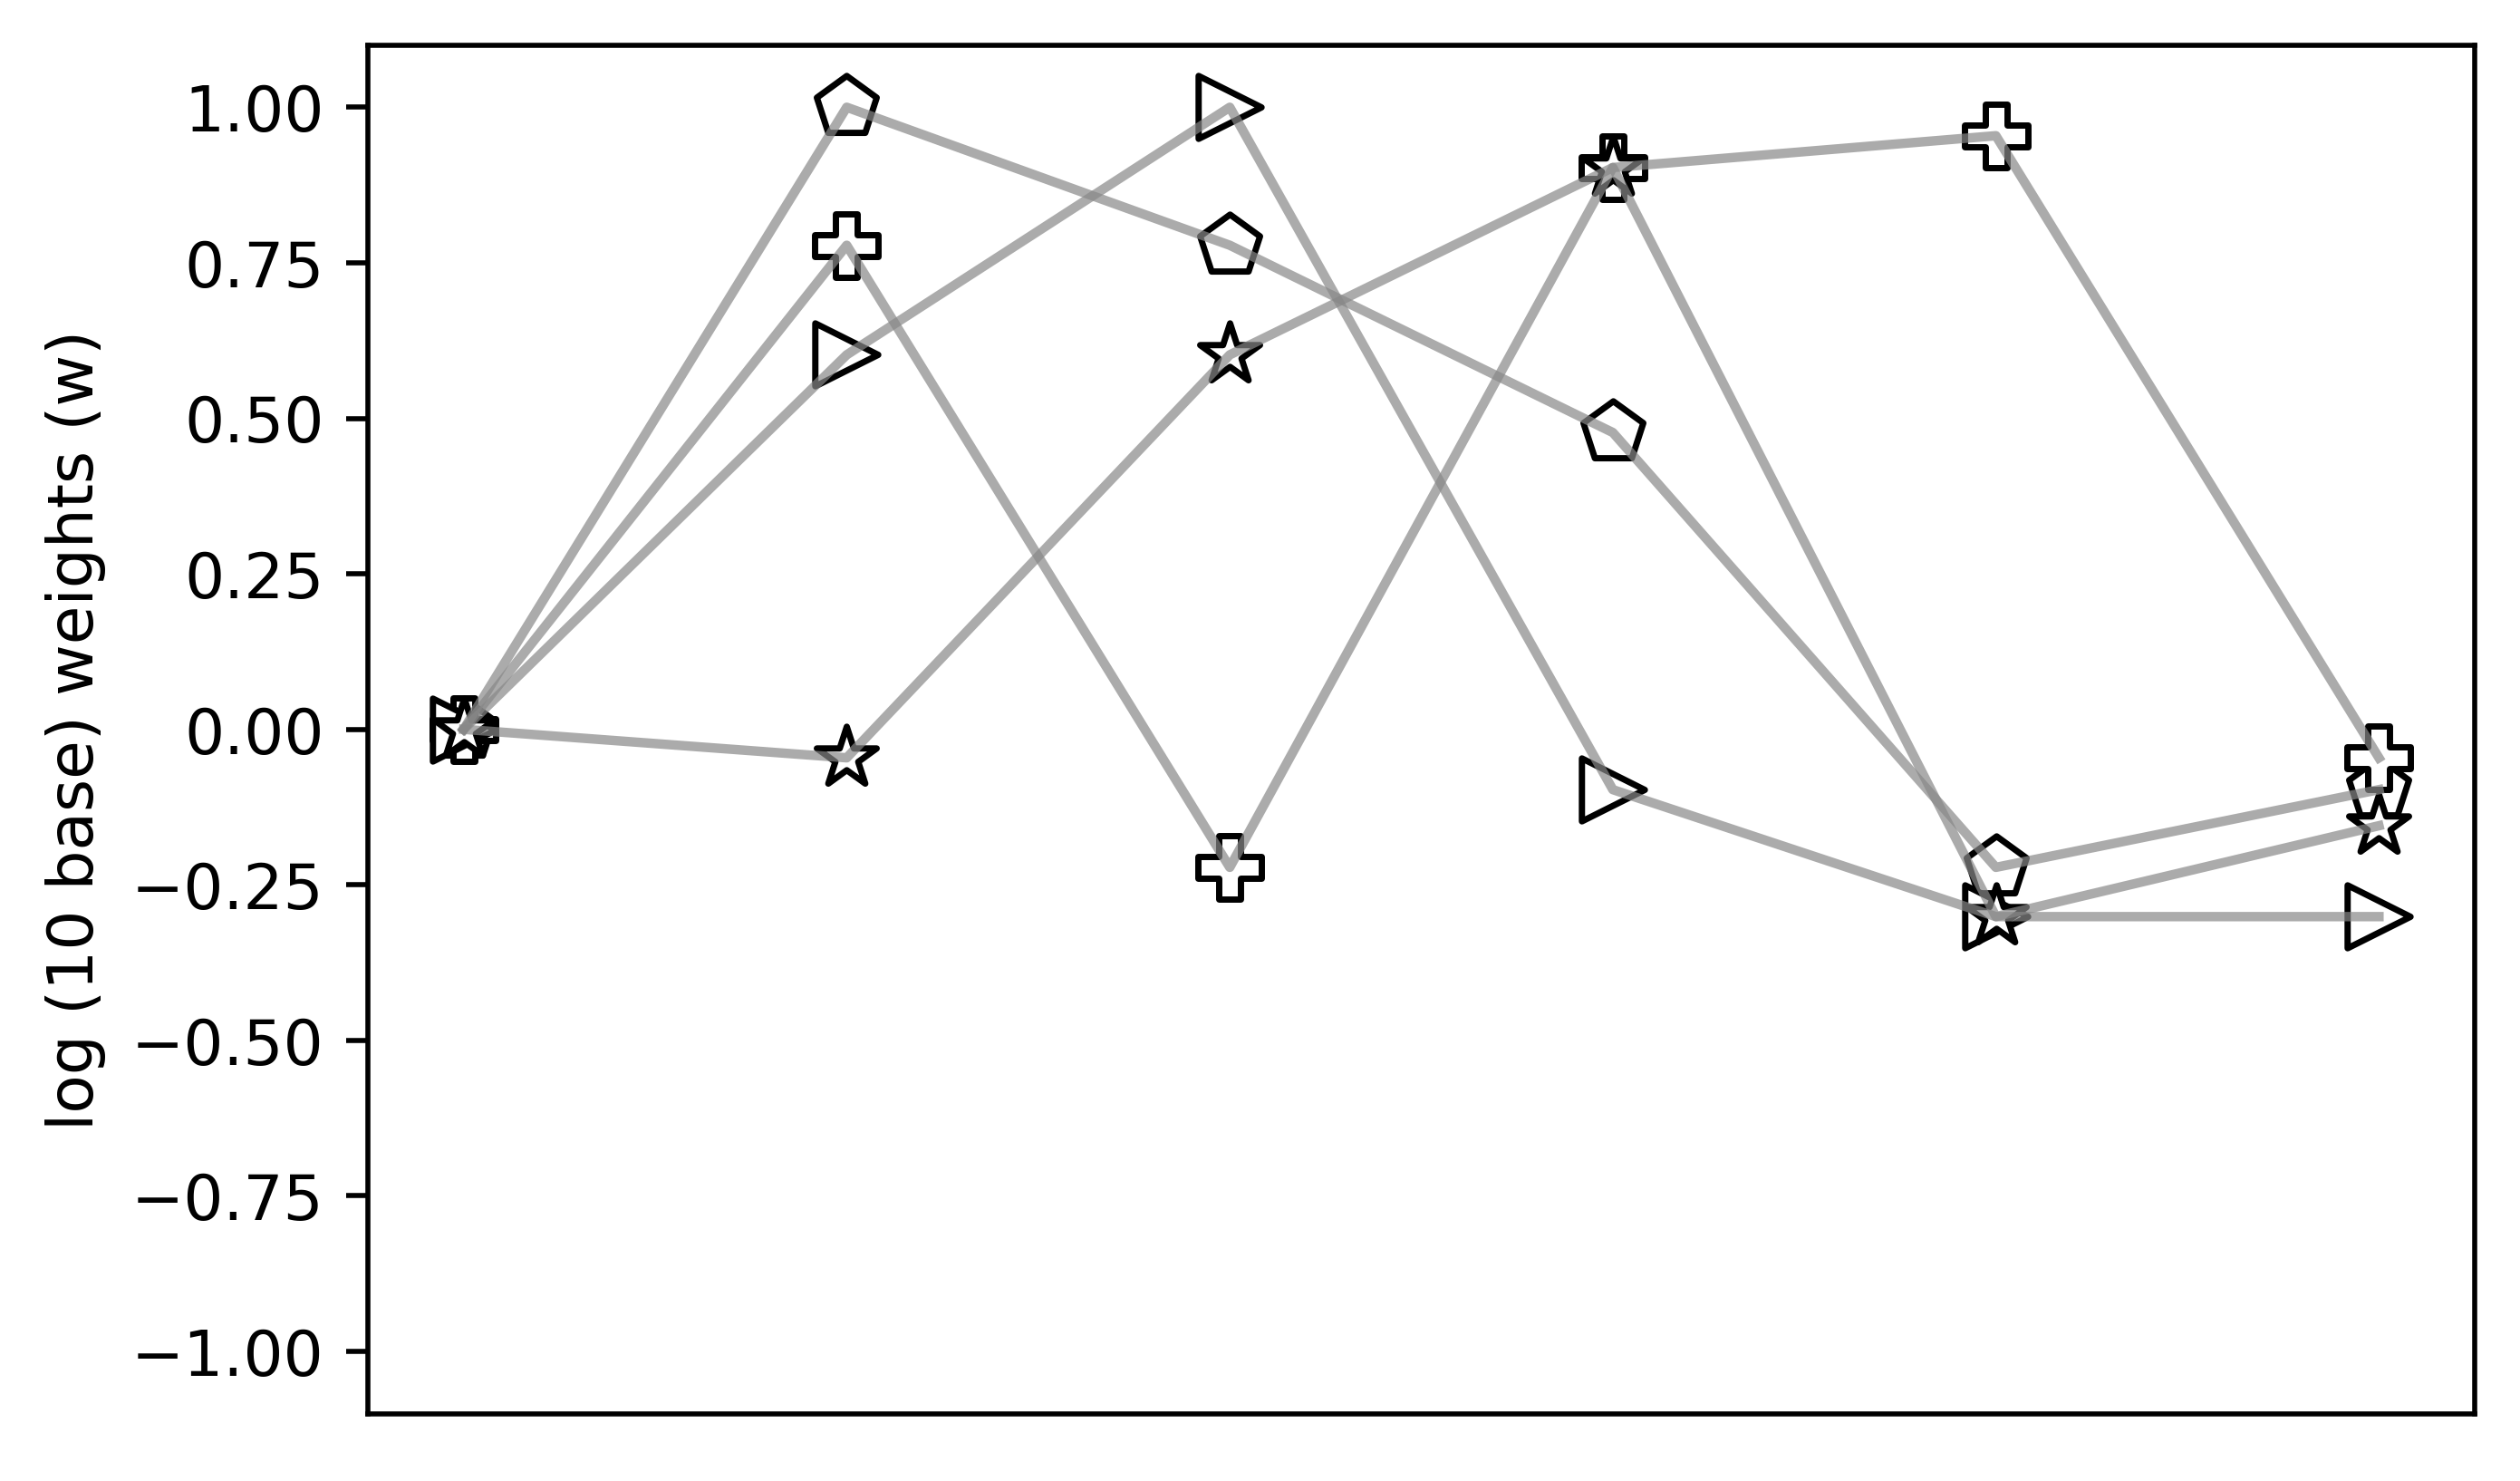

In [27]:
import seaborn as sns
import math


plt.figure(dpi=500)

sorted_dataframe = main_data[(main_data != 0).all(1)].drop_duplicates('sum',keep='first')



y1 = log_finder(sorted_dataframe['w1'])
y2 = log_finder(sorted_dataframe['w2'])
y3 = log_finder(sorted_dataframe['w3'])
y4 = log_finder(sorted_dataframe['w4'])


x1 = np.arange(len(y1))
x2 = np.arange(len(y2))
x3 = np.arange(len(y3))
x4 = np.arange(len(y4))


# plt.ylim([-2,11])
# plt.xlim([0,145])


# plt.plot(x1,y1,color = '#91f92e', marker = 'o')
# plt.plot(x2,y2,color='#962ef9', marker = 's')
# plt.plot(x3,y3,color ='#2e91f9', marker = '>')
# plt.plot(x4,y4, color = '#f92e91',marker = '*')
plt.plot(x1,y1,color = '#888888', alpha = .7)
plt.plot(x2,y2,color = '#888888', alpha = .7)
plt.plot(x3,y3,color = '#888888', alpha = .7)
plt.plot(x4,y4,color = '#888888', alpha = .7)
plt.scatter(x1,y1, marker = 'p', s = 100, facecolors = 'w', edgecolors='k', lw = 1)
plt.scatter(x2,y2, marker = 'P', s = 100, facecolors = 'w', edgecolors='k', lw = 1)
plt.scatter(x3,y3, marker = '>', s = 100, facecolors = 'w', edgecolors='k', lw = 1)
plt.scatter(x4,y4, marker = '*', s = 100, facecolors = 'w', edgecolors='k', lw = 1)


plt.xticks([])
plt.ylim([-1.1,1.1])
plt.ylabel('log (10 base) weights (w)')
# plt.legend(['w1','w2','w3','w4'])



In [28]:
list(sorted_dataframe['sum'])

[0.4285714285714286,
 0.48571428571428577,
 0.5428571428571429,
 0.5494209261006238,
 0.5741692517632145,
 0.6]

Text(0.5, 0, '\ncorrelation co-efficient')

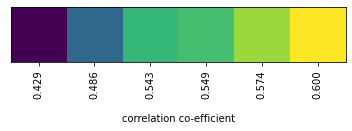

In [29]:
plt.imshow([sorted_dataframe['sum']])
labels = sorted_dataframe['sum'].values
plt.xticks(ticks = [0,1,2,3,4,5],labels = labels, rotation = 'vertical')
xx, locs = plt.xticks()
ll = ['%.3f' % a for a in labels]
plt.xticks(xx, ll)
plt.yticks([])
plt.xlabel('\ncorrelation co-efficient')